In [46]:
import os
import shutil
from pathlib import Path

import pyvista as pv
import ogstools as ot
import ogstools.variables as ov

import matplotlib.pyplot as plt
import numpy as np

from meshing import create_rectangle_mesh, create_cube_mesh

In [47]:
import os
os.getcwd()

'D:\\RUB-Aktiväten\\OGS\\github\\Getting_started_OGS'

# Path

In [48]:
OGS_PATH = None

In [49]:
if OGS_PATH is not None:
    os.environ["OGS_BIN_PATH"] = OGS_PATH
OUT_DIR = Path(os.environ.get("OGS_TESTRUNNER_OUT_DIR", "_out"))
MESH_DIR = OUT_DIR / "mesh"
shutil.rmtree(OUT_DIR, ignore_errors=True)
MESH_DIR.mkdir(parents=True, exist_ok=True)

# 2D mesh

In [50]:
MSH_FILE = MESH_DIR / "rectangle_2d.msh"

create_rectangle_mesh(
        MSH_FILE,
        width=10.0,
        height=10.0,
        mesh_size=1.0,
        center_z=-20.0)


meshes = ot.meshes_from_gmsh(MSH_FILE, log=False)
for name, mesh in meshes.items():
    vtu_path = MESH_DIR / f"{name}.vtu"
    pv.save_meshio(vtu_path, mesh)
    print(f"Saved {vtu_path}")


Saved _out\mesh\domain.vtu
Saved _out\mesh\physical_group_bottom.vtu
Saved _out\mesh\physical_group_right.vtu
Saved _out\mesh\physical_group_top.vtu
Saved _out\mesh\physical_group_left.vtu
Saved _out\mesh\physical_group_domain.vtu


## Plot 

C:\Users\acer\AppData\Local\Temp\ipykernel_12444\1801929542.py:26: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)


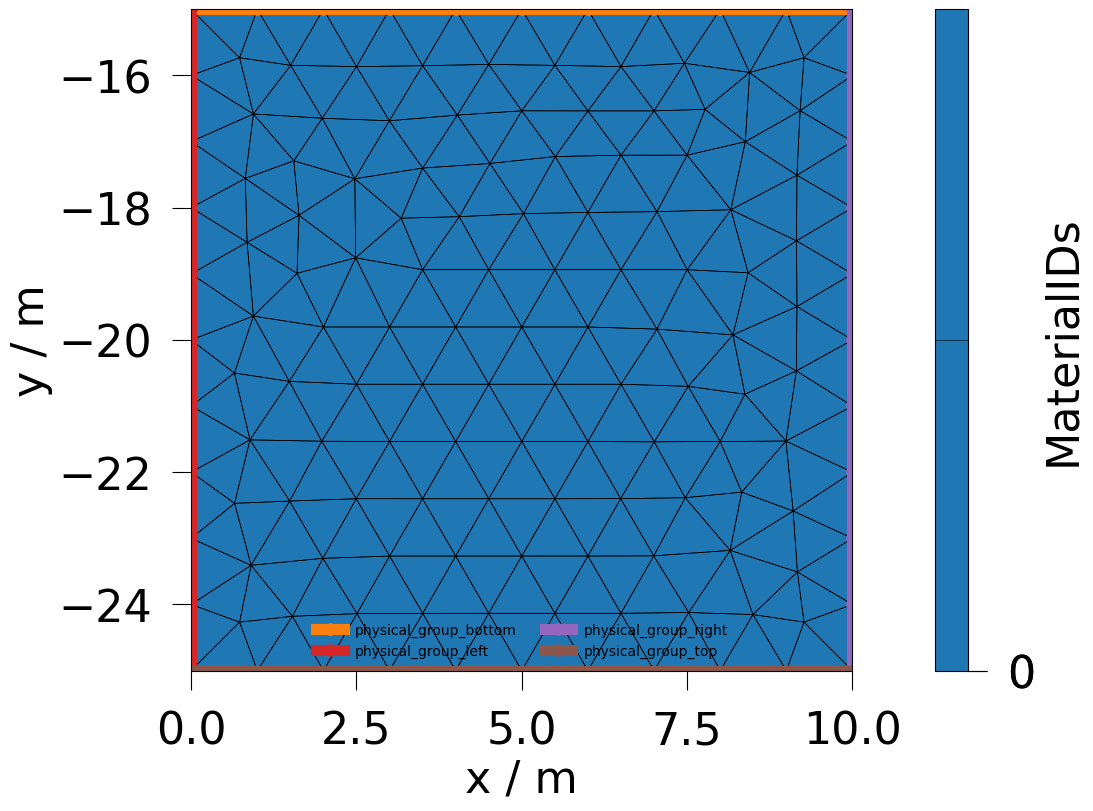

In [51]:
fig = meshes["domain"].plot_contourf(
    "MaterialIDs",
    figsize=(12, 8),
    dpi=100,
    cmap="tab20",
    alpha=0.3,
    linewidth=0,
)
ax = fig.axes[0]
for i, (name, mesh) in enumerate(sorted(meshes.items())):
    if mesh.area:  
        continue
    ls, marker = ("-", "") if "boundary" in name else ("-", "o")
    ot.plot.line(
        mesh,
        ax=ax,
        color=f"C{i}",
        lw=2,
        ls=ls,
        marker=marker,
        markersize=8,
        label=name,
    )
ax.set_aspect("equal")
ax.legend(ncol=2, fontsize=10, frameon=False)
fig.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
plt.show()

# 3D mesh

In [52]:
cube_file = MESH_DIR / "cube_3d.msh"

create_cube_mesh(
        cube_file,        
        width=10.0,
        height=10.0,
        thickness=10.0,
        mesh_size=1.0,
        center_z=-20.0  
    )

cube_meshes = ot.meshes_from_gmsh(cube_file, log=False)
for name, mesh in cube_meshes.items():
    vtu = MESH_DIR / f"cube_{name}.vtu"
    pv.save_meshio(vtu, mesh)
    print(f"Saved {vtu}")


Saved _out\mesh\cube_domain.vtu
Saved _out\mesh\cube_physical_group_points.vtu
Saved _out\mesh\cube_physical_group_edges.vtu
Saved _out\mesh\cube_physical_group_bottom.vtu
Saved _out\mesh\cube_physical_group_top.vtu
Saved _out\mesh\cube_physical_group_front.vtu
Saved _out\mesh\cube_physical_group_back.vtu
Saved _out\mesh\cube_physical_group_left.vtu
Saved _out\mesh\cube_physical_group_right.vtu
Saved _out\mesh\cube_physical_group_volume.vtu


## Plot 

C:\Users\acer\anaconda3\Lib\site-packages\pyvista\plotting\renderer.py:1846: PyVistaDeprecationWarning: `xlabel` is deprecated. Use `xtitle` instead.
  warnings.warn(
C:\Users\acer\anaconda3\Lib\site-packages\pyvista\plotting\renderer.py:1852: PyVistaDeprecationWarning: `ylabel` is deprecated. Use `ytitle` instead.
  warnings.warn(
C:\Users\acer\anaconda3\Lib\site-packages\pyvista\plotting\renderer.py:1858: PyVistaDeprecationWarning: `zlabel` is deprecated. Use `ztitle` instead.
  warnings.warn(


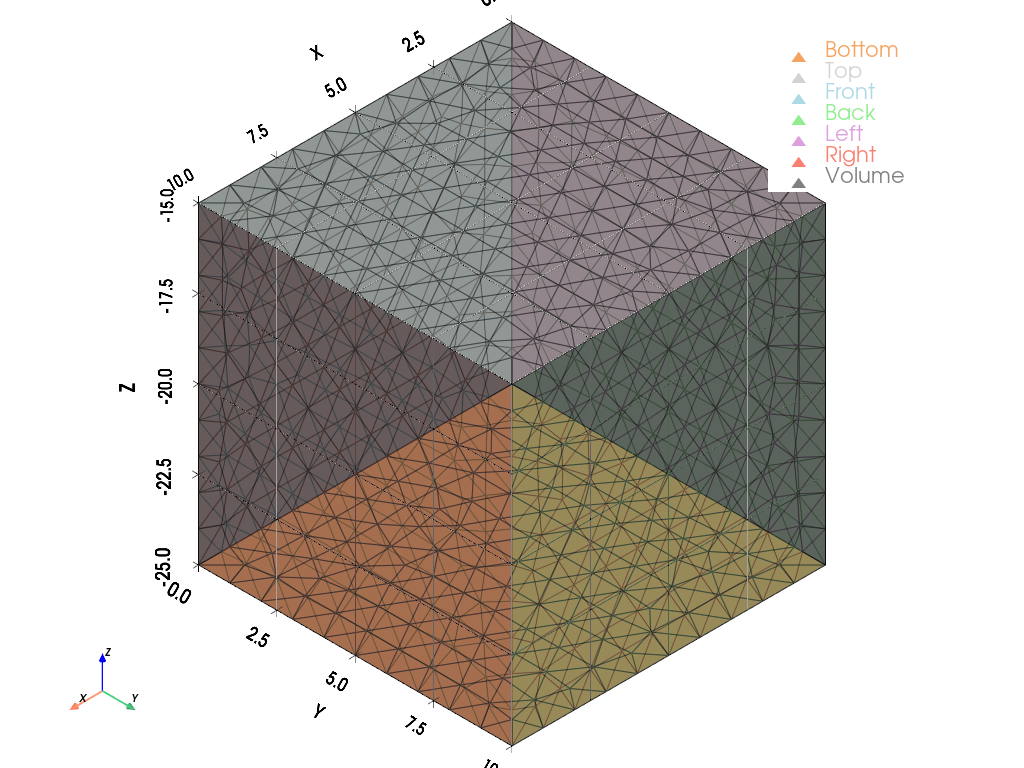

In [53]:
try:
    pv.set_jupyter_backend("static")
except Exception as e:
    print("PyVista backend not set:", e)


faces = {
    "bottom": pv.read(f"{MESH_DIR}/cube_physical_group_bottom.vtu"),
    "top":    pv.read(f"{MESH_DIR}/cube_physical_group_top.vtu"),
    "front":  pv.read(f"{MESH_DIR}/cube_physical_group_front.vtu"),
    "back":   pv.read(f"{MESH_DIR}/cube_physical_group_back.vtu"),
    "left":   pv.read(f"{MESH_DIR}/cube_physical_group_left.vtu"),
    "right":  pv.read(f"{MESH_DIR}/cube_physical_group_right.vtu"),
}
vol    = pv.read(f"{MESH_DIR}/cube_physical_group_volume.vtu")

plotter = pv.Plotter(off_screen=True)

face_colors = {
    "bottom": "sandybrown",
    "top":    "lightgray",
    "front":  "lightblue",
    "back":   "lightgreen",
    "left":   "plum",
    "right":  "salmon",
}
for name, mesh in faces.items():
    plotter.add_mesh(
        mesh,
        color=face_colors[name],
        opacity=0.7,
        show_edges=True,
        label=name.capitalize(),
    )

try:
    vol_surf = vol.extract_surface()
except AttributeError:
    vol_surf = vol
plotter.add_mesh(
    vol_surf,
    style="wireframe",
    color="gray",
    opacity=0.2,
    label="Volume",
)

plotter.show_bounds(
    grid="front",       
    location="outer",   
    all_edges=True,     
    ticks="both",       
    xlabel="X",        
    ylabel="Y",         
    zlabel="Z",         
    font_size=14
)

plotter.add_legend(bcolor="w")
plotter.show_axes()
plotter.enable_parallel_projection()
plotter.view_isometric()
plotter.show()

In [54]:
!NodeReordering -o ./_out/mesh/domain.vtu -i ./_out/mesh/domain.vtu 

[2025-07-29 17:42:30.338] [ogs] [info] Reordering nodes... 
[2025-07-29 17:42:30.338] [ogs] [info] Corrected 244 elements.
[2025-07-29 17:42:30.339] [ogs] [info] VTU file written.


In [55]:

!ogs SD_init.prj -m ./_out/mesh -o ./_out/

info: This is OpenGeoSys-6 version 6.5.5.
info: OGS started on 2025-07-29 17:42:30+0200.
info: Eigen use 16 threads
info: Reading project file SD_init.prj.
info: readRasters ...
info: readRasters done
info: ConstantParameter: E
info: ConstantParameter: nu
info: ConstantParameter: displacement0
info: ConstantParameter: zero
info: ConstantParameter: T0
info: FunctionParameter: sigma0
info: FunctionParameter: geo_stress
info: No source terms for process variable 'displacement' found.
info: Threads used for ParallelVectorMatrixAssembler: 1. This is the default when OGS_ASM_THREADS environment variable is not set.
info: SmallDeformation process initializeSubmeshOutput().
info: Initialize processes.
info: Time step #0 started. Time: 0. Step size: 0.
info: [time] Output of timestep 0 took 0.0065528 s.
info: Time step #0 took 0.0069295 s.
info: OpenGeoSys is now initialized.
info: OGS started on 2025-07-29 17:42:30+0200.
info: Solve processes.
info: Time step #1 started. Time: 10. Step size: 1

In [56]:

ms = ot.MeshSeries(f'{OUT_DIR}/init.pvd')
mesh = ms[-1]

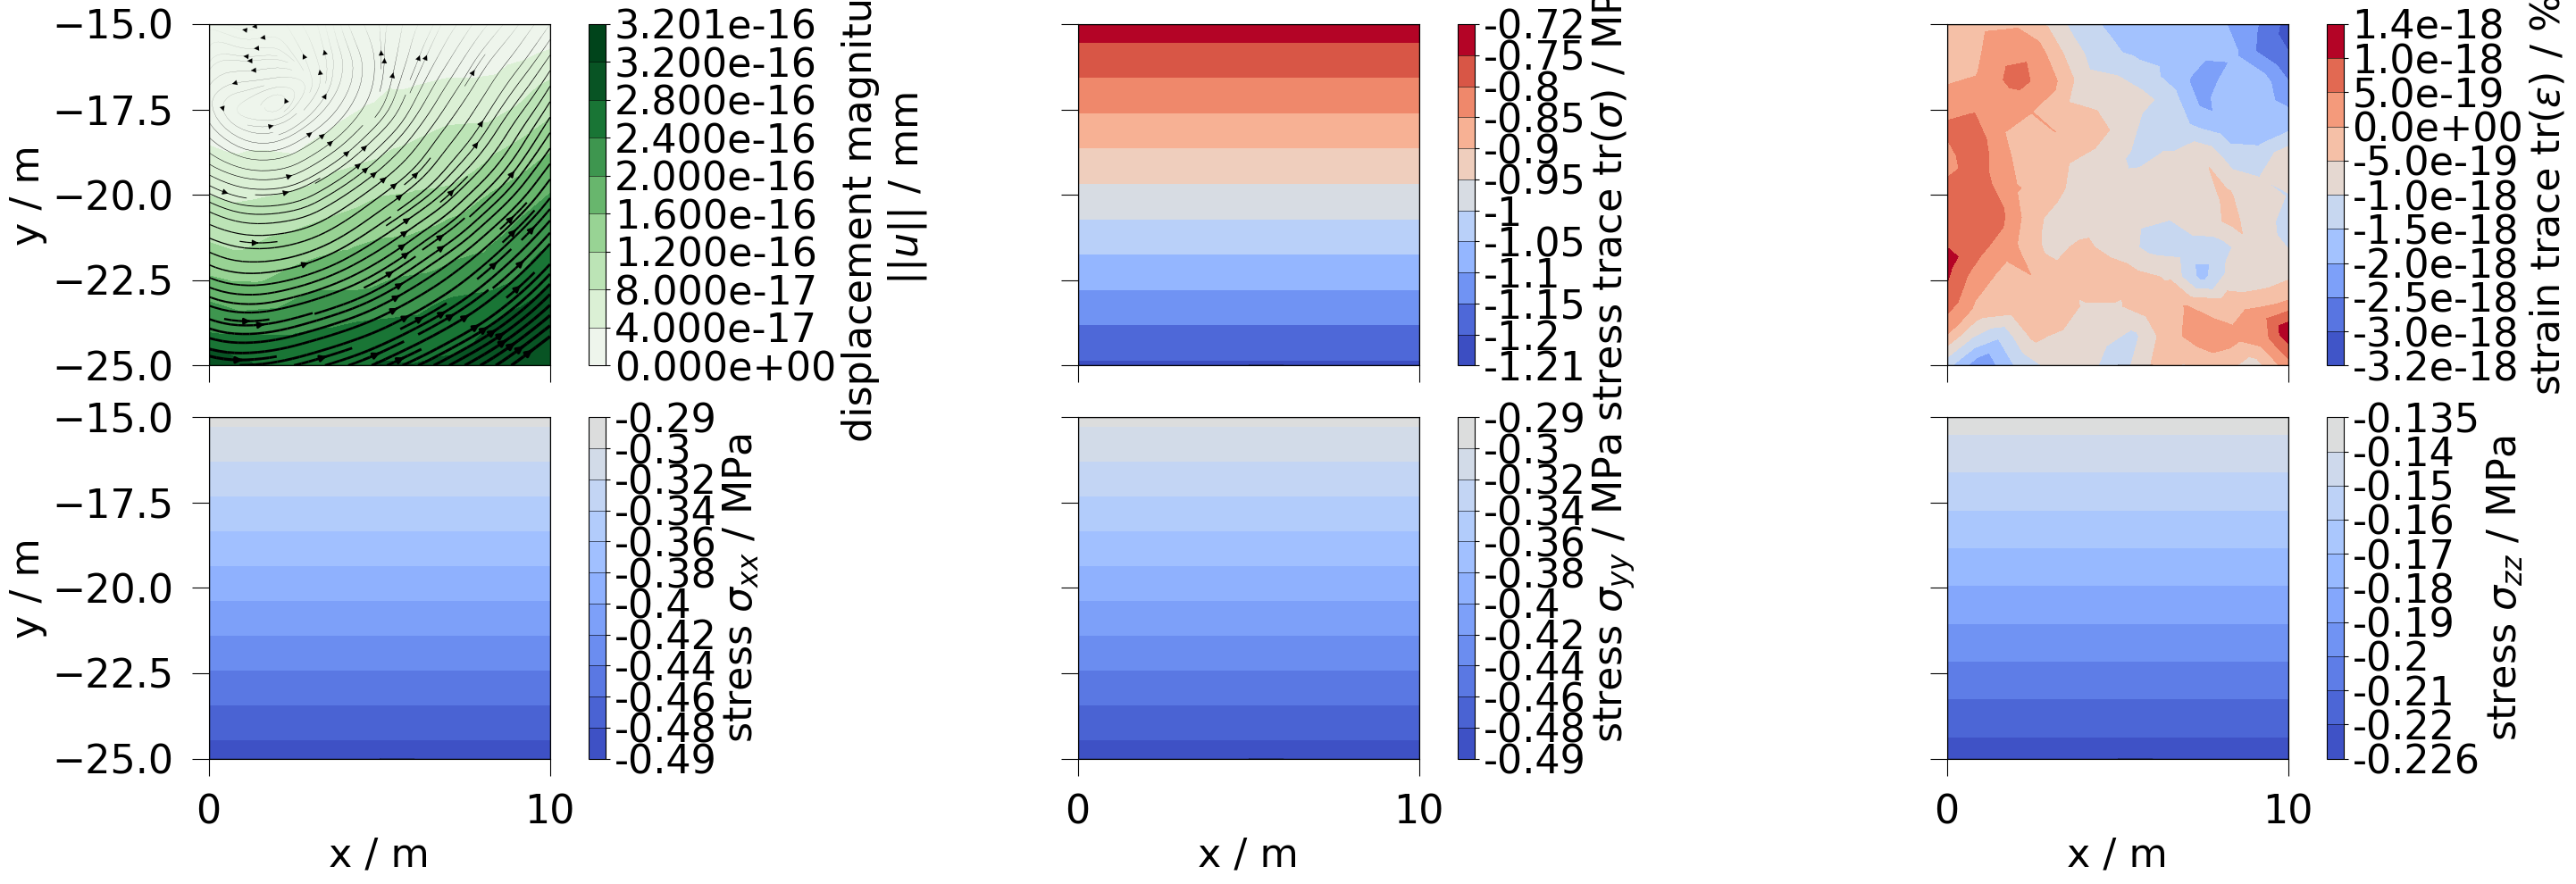

In [57]:


fig, axs = plt.subplots(nrows=2, ncols=3, figsize=[30, 10], sharex=True, sharey=True)
displacement = ot.variables.displacement.replace(output_unit="mm")
mesh.plot_contourf(displacement, fig, axs[0,0])
mesh.plot_contourf(ot.variables.stress.trace, fig, axs[0,1])
mesh.plot_contourf(ot.variables.strain.trace, fig, axs[0,2])

mesh.plot_contourf(ot.variables.stress["xx"], fig, axs[1,0])
mesh.plot_contourf(ot.variables.stress["yy"], fig, axs[1,1])
mesh.plot_contourf(ot.variables.stress["zz"], fig, axs[1,2])
fig.tight_layout()



In [58]:
!NodeReordering -o ./_out/mesh/cube_domain.vtu -i ./_out/mesh/cube_domain.vtu 

[2025-07-29 17:42:33.134] [ogs] [info] Reordering nodes... 
[2025-07-29 17:42:33.136] [ogs] [info] Corrected 0 elements.
[2025-07-29 17:42:33.143] [ogs] [info] VTU file written.


In [61]:
!ogs SD_init_3D.prj -m ./_out/mesh -o ./_out/

info: This is OpenGeoSys-6 version 6.5.5.
info: OGS started on 2025-07-29 17:46:41+0200.
info: Eigen use 16 threads
info: Reading project file SD_init_3D.prj.
info: readRasters ...
info: readRasters done
info: ConstantParameter: E
info: ConstantParameter: nu
info: ConstantParameter: displacement0
info: ConstantParameter: zero
info: ConstantParameter: T0
info: FunctionParameter: sigma0
info: FunctionParameter: geo_stress
info: No source terms for process variable 'displacement' found.
info: Threads used for ParallelVectorMatrixAssembler: 1. This is the default when OGS_ASM_THREADS environment variable is not set.
info: SmallDeformation process initializeSubmeshOutput().
info: Initialize processes.
info: Time step #0 started. Time: 0. Step size: 0.
info: [time] Output of timestep 0 took 0.0556419 s.
info: Time step #0 took 0.0640015 s.
info: OpenGeoSys is now initialized.
info: OGS started on 2025-07-29 17:46:42+0200.
info: Solve processes.
info: Time step #1 started. Time: 10. Step size